In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Helpers

In [32]:
def plot_four(im1, im2, im3, im4, t1='Im1', t2='Im2', t3='Im3', t4='Im4'):
    fig = plt.figure(figsize=(8, 8))
    plt.subplot(2, 2, 1)
    plt.imshow(im1, cmap='gray')
    plt.title(t1)
    plt.xticks([])
    plt.yticks([])

    plt.subplot(2,2,2),
    plt.imshow(im2, cmap='gray')
    plt.title(t2)
    plt.xticks([])
    plt.yticks([])

    plt.subplot(2,2,3)
    plt.imshow(im3, cmap='gray')
    plt.title(t3)
    plt.xticks([])
    plt.yticks([])


    plt.subplot(2,2,4)
    plt.imshow(im4, cmap='gray')
    plt.title(t4)
    plt.xticks([])
    plt.yticks([])

    plt.show()
    plt.tight_layout()

## Image Gradients

In [43]:
img = cv2.imread('chess_board.png')
img.shape

(233, 216, 3)

In [44]:
og_img = img.copy()

In [13]:
laplacian = cv2.Laplacian(img, cv2.CV_64F)
laplacian.shape

(233, 216, 3)

In [14]:
sobel_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=5)
sobel_x.shape

(233, 216, 3)

In [15]:
sobel_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=5)
sobel_y.shape

(233, 216, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


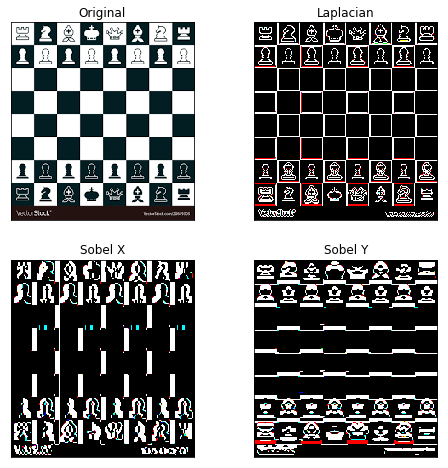

<Figure size 432x288 with 0 Axes>

In [33]:
plot_four(img, laplacian, sobel_x, sobel_y, t1='Original', t2='Laplacian', t3='Sobel X', t4='Sobel Y')

## Canny Edge Detection

- Noise Reduction (Edge detection is susceptible to noise in the image)
- Intensity Gradient of Image (Smoothened image filtered with sobelx & sobely, then find edge gradient and direction from each). Gradient direction is always perpendicular to edges.
- Non-max suppression (Unwanted pixel removal, hence every pixel is checked to see if it is a local maxima in its neighborhood in the direction of gradient)
- Hysteresis Thresholding (checks if any edges with intensity gradient more than max_val are present (edges) or less than min_val are present (non-edges)

In [22]:
edges = cv2.Canny(img, 100, 200)
edges.shape

(233, 216)

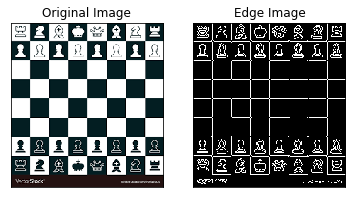

<Figure size 432x288 with 0 Axes>

In [23]:
plt.subplot(121),
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.xticks([])
plt.yticks([])

plt.subplot(122)
plt.imshow(edges, cmap='gray')
plt.title('Edge Image')
plt.xticks([])
plt.yticks([])

plt.show()
plt.tight_layout()

## Image Pyramids

Same image with different resolutions (Stack of biggest image at the bottom, smallest at the top)
Two types of pyramids:
- Gaussian Pyramids: Low-res images in this are formed by removing consecutive rows & columns from high-res image. Then, each pixel in the low-res is formed by the contribution of 5 pixels from high-res image with Gaussian weights.

- Laplacian Pyramids: Formed using Gaussian pyramids. Most elements are zero, mostly used in image compression. A level here is formed by the difference between that level & the expanded version of its upper level in Gaussian pyramid.  

In [27]:
high_res = cv2.pyrUp(img)
high_res.shape

(466, 432, 3)

In [29]:
low_res = cv2.pyrDown(high_res)
low_res.shape

(233, 216, 3)

## Contours

Contours - curves joining continuous points along a boundary having same color or intensity. Useful for object detection, recognition

In [31]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_gray.shape

(233, 216)

In [34]:
_, thresh = cv2.threshold(img_gray, 127, 255, 0)
thresh.shape

(233, 216)

In [40]:
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [41]:
cont_img = cv2.drawContours(img, contours, -1, (0, 0, 255), 2)
cont_img.shape

(233, 216, 3)

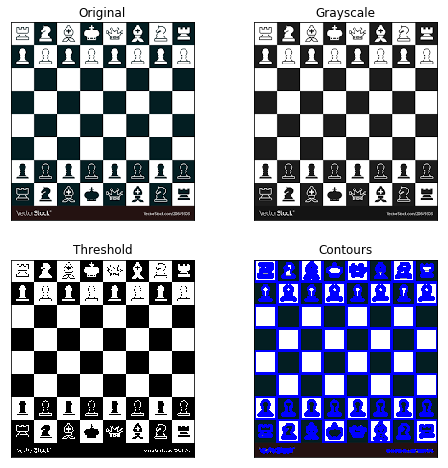

<Figure size 432x288 with 0 Axes>

In [45]:
plot_four(og_img, img_gray, thresh, cont_img, t1='Original', t2='Grayscale', t3='Threshold', t4='Contours')

## Contour Features

### Image Moments

Used to calculate mass, area etc. of an object. 

In [48]:
cnt = contours[30]
cnt

array([[[ 18, 222]],

       [[ 18, 225]],

       [[ 18, 224]],

       [[ 19, 223]],

       [[ 20, 224]],

       [[ 20, 225]],

       [[ 20, 224]],

       [[ 21, 223]],

       [[ 22, 223]],

       [[ 21, 223]],

       [[ 20, 224]]], dtype=int32)

In [49]:
M = cv2.moments(cnt)
M

{'m00': 1.0,
 'm01': 223.0,
 'm02': 49729.166666666664,
 'm03': 11089678.5,
 'm10': 18.333333333333332,
 'm11': 4088.333333333333,
 'm12': 911701.3666666667,
 'm20': 336.16666666666663,
 'm21': 74965.16666666667,
 'm30': 6165.1,
 'mu02': 0.16666666666424135,
 'mu03': 1.862645149230957e-09,
 'mu11': 0.0,
 'mu12': -0.022222222069103736,
 'mu20': 0.055555555555542924,
 'mu21': 1.8985701899509877e-11,
 'mu30': 0.007407407409118605,
 'nu02': 0.16666666666424135,
 'nu03': 1.862645149230957e-09,
 'nu11': 0.0,
 'nu12': -0.022222222069103736,
 'nu20': 0.055555555555542924,
 'nu21': 1.8985701899509877e-11,
 'nu30': 0.007407407409118605}

In [51]:
## Calculating Centroid using Moment
cx = int(M['m10']/M['m00'])
cy = int(M['m01']/M['m00'])
cx, cy

(18, 223)

In [52]:
area = cv2.contourArea(cnt)
area

1.0

In [54]:
perimeter = cv2.arcLength(cnt, True)
perimeter

16.485281229019165

In [55]:
## Contour Approximation 
## Approximates a contour shape to another shape with less number of vertices
epsilon = 0.1 * cv2.arcLength(cnt, True)
approx = cv2.approxPolyDP(cnt, epsilon, True)
approx

array([[[ 18, 225]],

       [[ 22, 223]],

       [[ 18, 222]]], dtype=int32)

In [61]:
## Convex Hull
## Checks a curve for convexity defects and corrects it 
hull = cv2.convexHull(cnt)
hull

array([[[ 22, 223]],

       [[ 20, 225]],

       [[ 18, 225]],

       [[ 18, 222]]], dtype=int32)

In [62]:
## Checking Convexity
is_convex = cv2.isContourConvex(cnt)
is_convex

False

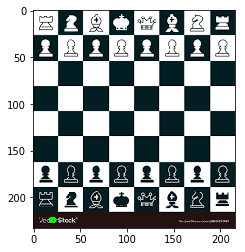

In [63]:
## Bounding Rectangle
x, y, w, h = cv2.boundingRect(cnt)
img = cv2.rectangle(img, (x,y), (x+w,y+h), (0,255,0), 2)
plt.imshow(img)

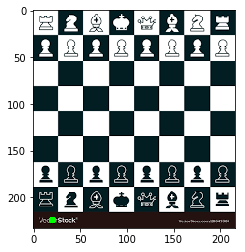

In [65]:
## Fitting an Ellipse
ellipse = cv2.fitEllipse(cnt)
img = cv2.ellipse(img,ellipse,(0,255,0),2)
plt.imshow(img)

## Histograms